# Importing Libraries

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import numpy as np

# Importing Dataset

In [3]:
# Define tickers

tickers = {
    'Energy': ['XOM', 'CVX', 'COP'],
    'Healthcare': ['JNJ', 'PFE', 'MRK'],
    'IT': ['AAPL', 'MSFT', 'GOOGL']
}

flat_tickers = [ticker for sector in tickers.values() for ticker in sector]

# Download daily adjusted prices

data = yf.download(flat_tickers, start='2010-01-01', end='2022-12-31', auto_adjust=True)

[*********************100%***********************]  9 of 9 completed


In [4]:
# Select 'Close' price

data = data['Close']

In [5]:
print(data.head(3))

Ticker          AAPL        COP        CVX      GOOGL        JNJ        MRK  \
Date                                                                          
2010-01-04  6.424605  23.181879  42.134510  15.576998  40.675056  20.788481   
2010-01-05  6.435713  23.203917  42.432964  15.508403  40.203415  20.872738   
2010-01-06  6.333345  23.371464  42.438282  15.117455  40.530426  21.153589   

Ticker           MSFT       PFE        XOM  
Date                                        
2010-01-04  23.173346  9.519679  38.213135  
2010-01-05  23.180836  9.383904  38.362339  
2010-01-06  23.038576  9.353728  38.693897  


# Plot Prices

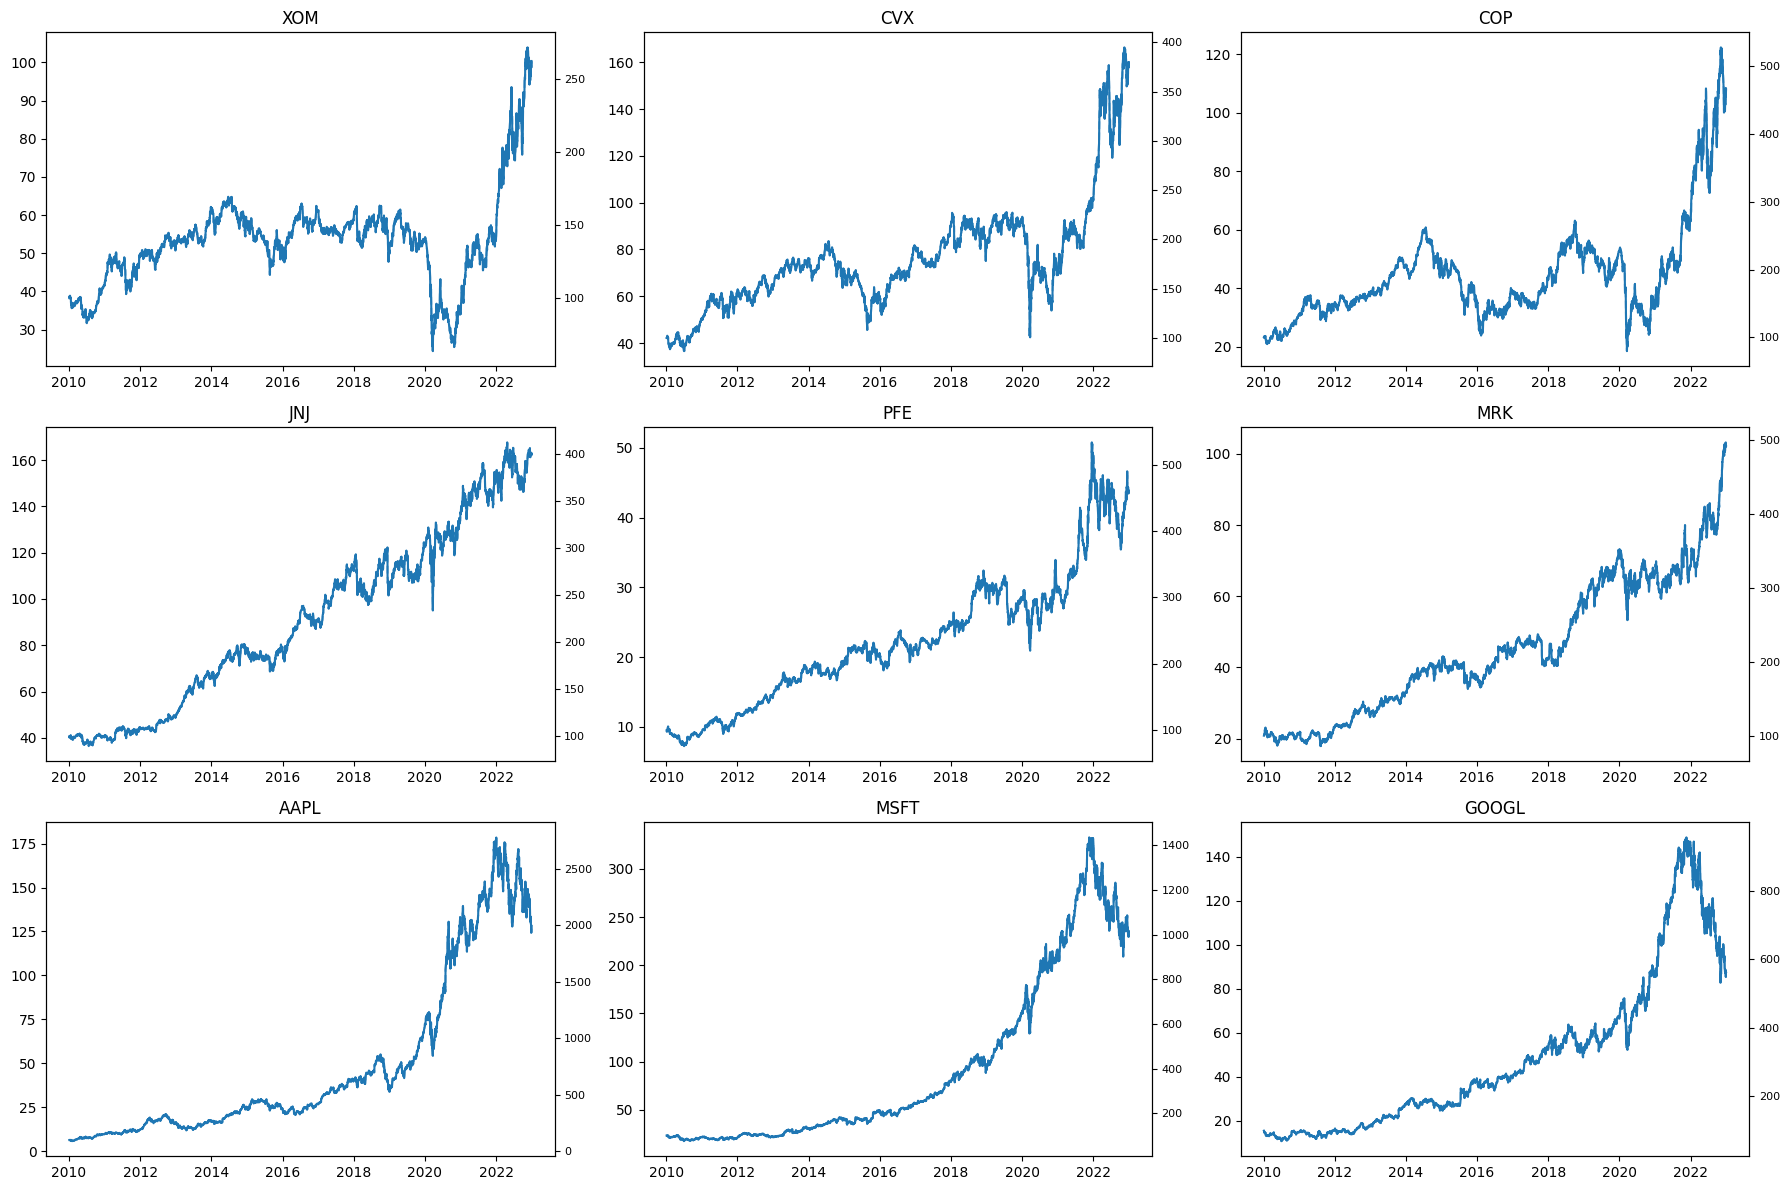

In [8]:
# Create a list of tickers ordered by sector
ordered_tickers = [ticker for sector in tickers.values() for ticker in sector]

# Plot daily prices (3x3)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)

for i, ticker in enumerate(ordered_tickers):
    ax = axes[i]
    series = data[ticker]

    # Left axis: actual price
    ax.plot(series.index, series, label='Price')
    ax.set_title(ticker)

    # Right axis: normalized price (indexed to 100)
    ax2 = ax.twinx()
    normalized = series / series.iloc[0] * 100
    ax2.plot(series.index, normalized, linestyle='--', alpha=0.6, label='Normalized to 100')

    # Optional: adjust right axis label size
    ax2.tick_params(axis='y', labelsize=8)

# Hide unused axes if fewer than 9 plots
for j in range(len(ordered_tickers), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


All stock price series display a clear upward trend over time, especially IT stocks. This indicates non-stationarity, meaning the mean and variance of the series are not constant over time.

> Add blockquote



*   IT stocks (AAPL, MSFT, GOOGL) show strong and consistent growth from 2010 to 2022, with much steeper trends than Energy or Healthcare.
*   Energy stocks (XOM, CVX, COP) exhibit higher relative volatility, with noticeable drops during oil price shocks (e.g., 2014–2016).
*   Healthcare stocks (JNJ, PFE, MRK) have fewer extreme movements compared to Energy.
*   Market corrections (e.g., 2020 COVID-19 crash) are visible across all sectors, but the impact varies: IT is less affected, Energy more severely.



# Plot simple returns

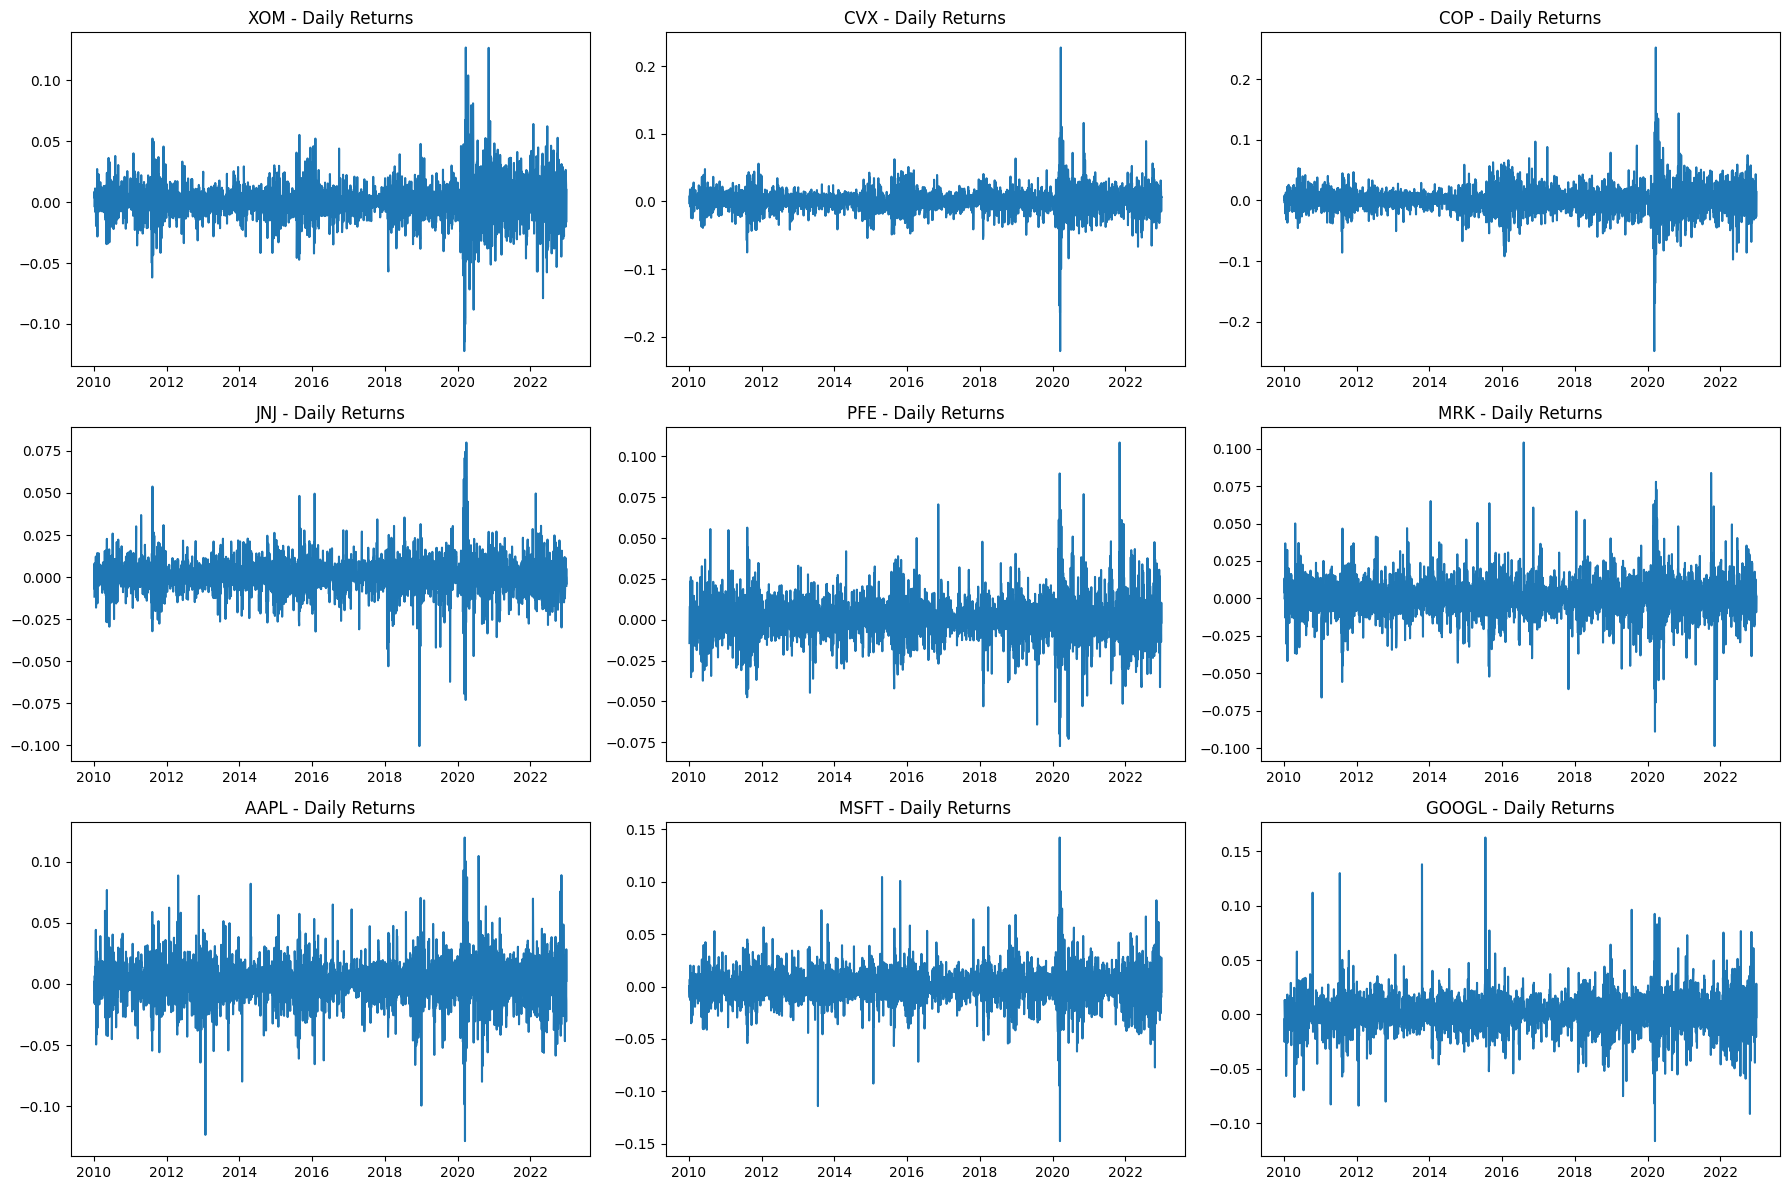

In [10]:
# Calculate simple daily returns
returns = data.pct_change().dropna()

# Create a list of tickers ordered by sector
ordered_tickers = [ticker for sector in tickers.values() for ticker in sector]

# Plot daily returns (3x3)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)

for i, ticker in enumerate(ordered_tickers):
    axes[i].plot(returns.index, returns[ticker])
    axes[i].set_title(f"{ticker} - Daily Returns")

# Hide unused axes if fewer than 9 plots
for j in range(len(ordered_tickers), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Technology stocks clearly exhibit the highest and most persistent volatility.

Energy shows periods of both high and low volatility depending on market conditions (e.g. oil price shocks).

Healthcare remains the most stable sector overall, with consistently lower volatility.


# Plot Boxplots

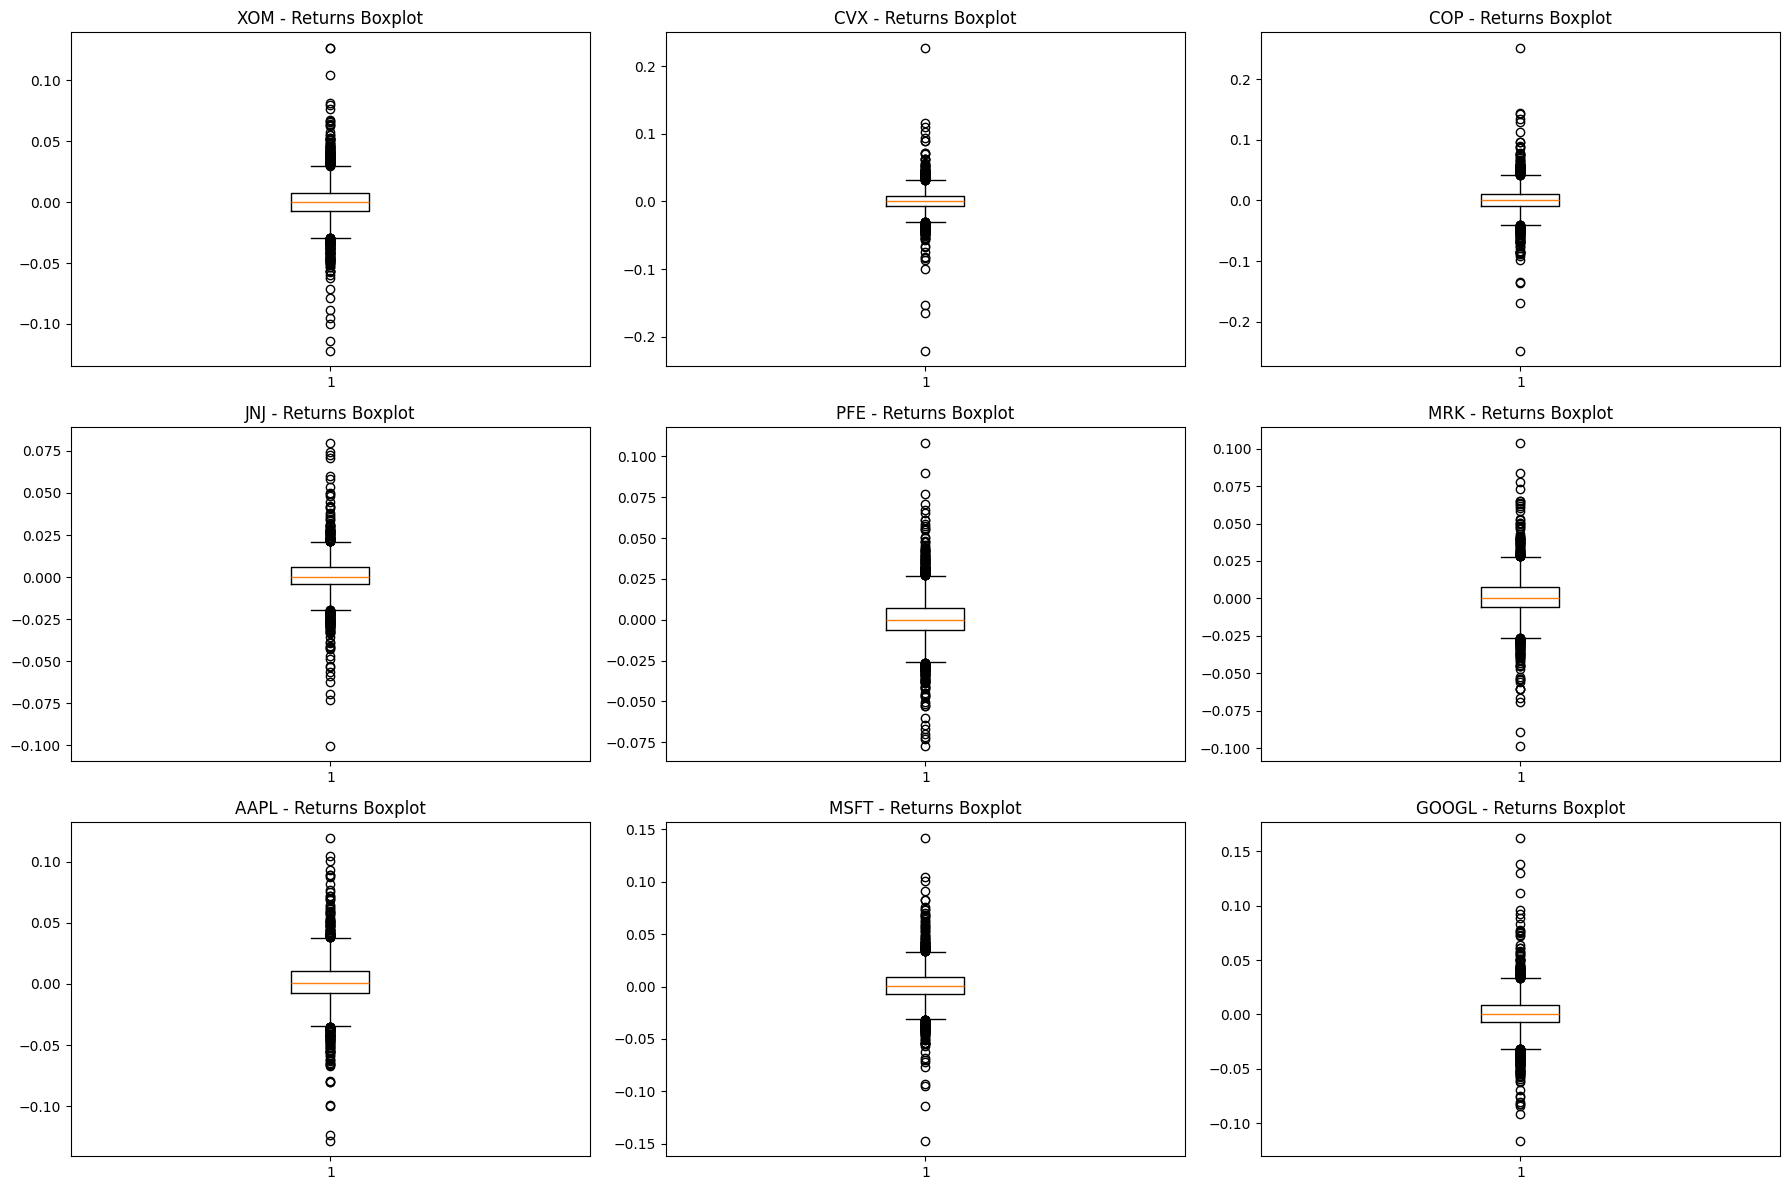

In [11]:
# Create a list of tickers ordered by sector
ordered_tickers = [ticker for sector in tickers.values() for ticker in sector]

# Plot boxplots of daily returns (3x3)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)

for i, ticker in enumerate(ordered_tickers):
    axes[i].boxplot(returns[ticker])
    axes[i].set_title(f"{ticker} - Returns Boxplot")

# Hide unused axes if fewer than 9 plots
for j in range(len(ordered_tickers), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

The median daily return is close to zero for all sectors, consistent with efficient market behavior.

All sectors occasionally experience severe daily returns, with Technology and Energy showing more extreme outliers

# Plot Histograms

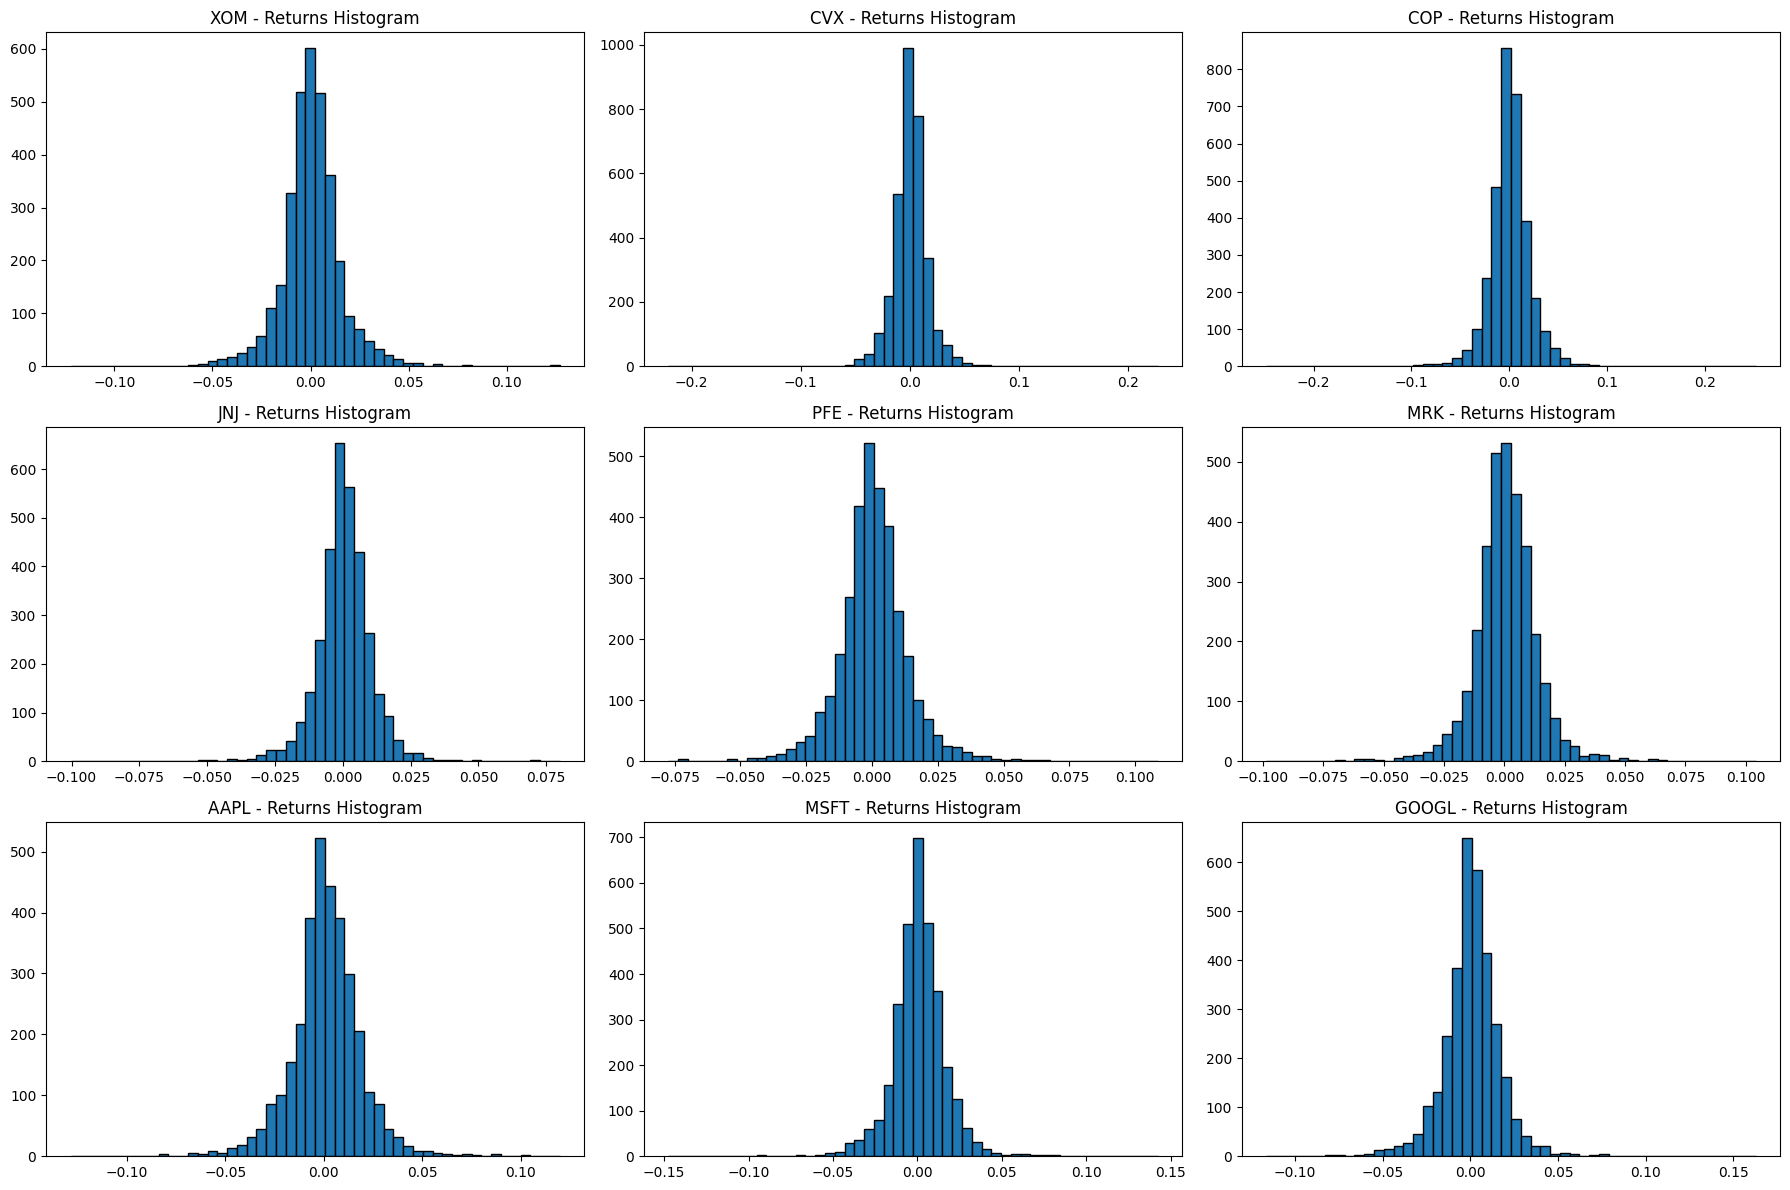

In [12]:
# Create a list of tickers ordered by sector
ordered_tickers = [ticker for sector in tickers.values() for ticker in sector]

# Plot histograms of daily returns (3x3)
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = np.ravel(axes)

for i, ticker in enumerate(ordered_tickers):
    axes[i].hist(returns[ticker], bins=50, edgecolor='black')
    axes[i].set_title(f"{ticker} - Returns Histogram")

# Hide unused axes if fewer than 9 plots
for j in range(len(ordered_tickers), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Return distributions are not perfectly normal.
Mean is near zero.

Histograms show that most daily returns cluster around zero.

Technology stocks have wider distributions with heavier tails, indicating higher volatility.

Energy returns show periods of both narrow and wide distributions, reflecting variable volatility.

Healthcare returns are more concentrated, consistent with lower daily volatility.


# Calculate skewness and kurtosis

In [13]:
# Skewness and kurtosis

stats_df = pd.DataFrame(index=returns.columns)
stats_df['Skewness'] = returns.apply(skew)
stats_df['Kurtosis'] = returns.apply(kurtosis)

print("Skewness and Kurtosis of daily returns:")
print(stats_df)

Skewness and Kurtosis of daily returns:
        Skewness   Kurtosis
Ticker                     
AAPL   -0.056380   5.098206
COP     0.030976  15.351825
CVX    -0.215241  24.504480
GOOGL   0.438896   8.927978
JNJ    -0.195701   9.558528
MRK     0.091006   6.501445
MSFT    0.033563   8.065609
PFE     0.281558   5.219317
XOM     0.053161   7.695965


Most stocks have skewness near zero, so returns are roughly symmetric, with GOOGL and PFE slightly positively skewed, and CVX and JNJ slightly negatively skewed.

Kurtosis is above 3 for all stocks, indicating fat tails and a higher probability of extreme returns than normal. Energy stocks (CVX, COP, XOM) show particularly high kurtosis, reflecting their greater volatility and sensitivity to shocks.

Overall, returns are non-normal, especially for Energy, while IT and Healthcare are moderately leptokurtic.